In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train= pd.read_csv('Linear_X_Train.csv')
y_train= pd.read_csv('Linear_Y_Train.csv')
x_test= pd.read_csv('Linear_X_Test.csv')

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(3750, 1)
(3750, 1)
(1250, 1)


In [4]:
x_train.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [5]:
x_train= x_train.values
y_train= y_train.values
x_test= x_test.values

In [6]:
x_train

array([[-0.28930742],
       [-0.58880963],
       [ 1.02750749],
       ...,
       [-0.30516366],
       [ 1.67583291],
       [-0.49175724]])

In [7]:
print(x_train.std())
print(x_train.mean())

0.9920801322508517
-0.03779466168006855


In [8]:
x_train= (x_train-x_train.mean())/x_train.std()

In [9]:
print(x_train.std())
print(x_train.mean())

1.0
3.789561257387201e-18


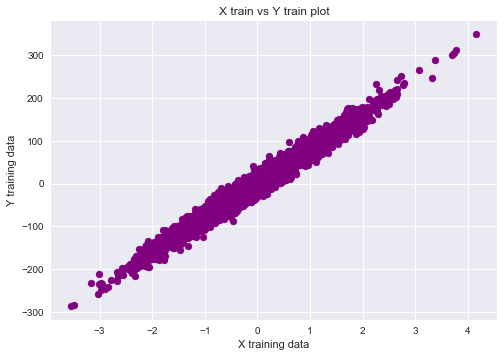

In [15]:
plt.style.use('seaborn')
plt.scatter(x_train, y_train, color='purple')
plt.xlabel('X training data')
plt.ylabel('Y training data')
plt.title('X train vs Y train plot')
plt.show()

In [16]:
def hypothesis(x,theta):
    y_= theta[1]*x+theta[0]
    return y_

def gradient(X,Y,theta):
    m= x_train.shape[0]
    grad= np.zeros((2,))
    for i in range(m):
        x=x_train[i]
        y=y_train[i]
        y_=hypothesis(x,theta)
        grad[0]=grad[0]+(y_-y)
        grad[1]=grad[1]+(y_-y)*x
    return grad/m

def error(X,Y,theta):
    m = x_train.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(x_train[i],theta)
        total_error += (y_ - y_train[i])**2
        
    return (total_error/m)
    

def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list

In [17]:
theta,error_list,theta_list = gradientDescent(x_train, y_train)

In [18]:
theta

array([ 0.6838508 , 79.90361453])

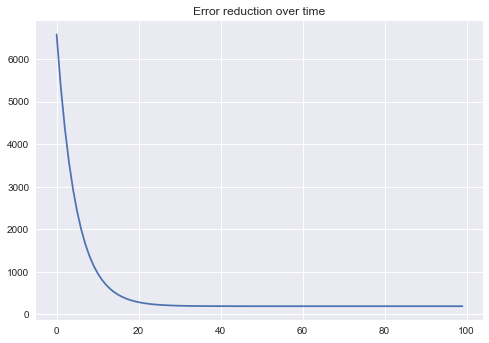

In [20]:
plt.plot(error_list)
plt.title('Error reduction over time')
plt.show()

In [21]:
y_= hypothesis(x_train, theta)

In [22]:
y_

array([[-19.5733619 ],
       [-43.69571729],
       [ 86.4848761 ],
       ...,
       [-20.85044708],
       [138.70197319],
       [-35.87897262]])

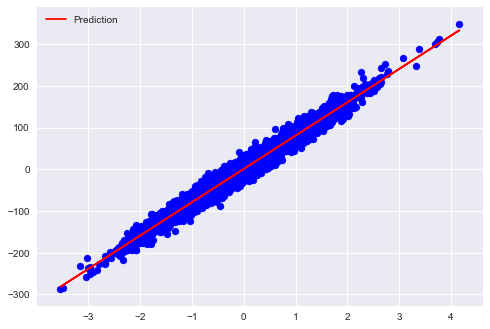

In [23]:
plt.plot(x_train,y_, color='red', label='Prediction')
plt.scatter(x_train, y_train, color='blue')
plt.legend()
plt.show()

In [24]:
#Checking the prediction of test data
y_= hypothesis(x_test, theta)
y_

array([[-149.37069577],
       [ -68.75494042],
       [-201.48687035],
       ...,
       [  10.9121384 ],
       [ -21.53235759],
       [ -53.68460035]])

In [25]:
df= pd.DataFrame(y_, columns=['y'])

In [26]:
df.head()

,y
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897


In [27]:
df.to_csv('Y_pred.csv', index=False)

# Linear Regression using scikitlearn library

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Creating model
reg=LinearRegression()
#Fitting training data
reg=reg.fit(x_train,y_train)
#Y Prediction on testing x data
Y_pred=reg.predict(x_test)
#displaying the y predictions.
Y_pred

array([[-149.37466337],
       [ -68.7567667 ],
       [-201.49222227],
       ...,
       [  10.91242825],
       [ -21.53292954],
       [ -53.68602633]])

In [29]:
df2= pd.DataFrame(Y_pred, columns=['y'])

In [30]:
df2.head()

,y
0,-149.374663
1,-68.756767
2,-201.492222
3,221.240119
4,47.908170


In [31]:
df.to_csv('Y_pred_sklearn.csv', index=False)

# It was observed that by both the ways the accuracy came out to be 97 percent.